# Linear model POD

In [1]:
# import relevant module
import openturns as ot
import otpod
# enable display figure in notebook
try:
    %matplotlib inline
except:
    pass

## Generate data

In [2]:
N = 100
ot.RandomGenerator.SetSeed(123456)
defectDist = ot.Uniform(0.1, 0.6)
# normal epsilon distribution
epsilon = ot.Normal(0, 1.9)
defects = defectDist.getSample(N)
signalsInvBoxCox = defects * 43. + epsilon.getSample(N) + 2.5
# Inverse Box Cox transformation
invBoxCox = ot.InverseBoxCoxTransform(0.3)
signals = invBoxCox(signalsInvBoxCox)

## Build POD using previous linear analysis

In [3]:
# run the analysis with Gaussian hypothesis of the residuals (default case)
analysis = otpod.UnivariateLinearModelAnalysis(defects, signals, boxCox=True)

In [4]:
# signal detection threshold
detection = 200.
# Use the analysis to build the POD with Gaussian hypothesis
# keyword arguments must be given
PODGauss = otpod.UnivariateLinearModelPOD(analysis=analysis, detection=detection)
PODGauss.run()

## Build POD with Gaussian hypothesis

In [5]:
# The previous POD is equivalent to the following POD
PODGauss = otpod.UnivariateLinearModelPOD(defects, signals, detection,
                                     resDistFact=ot.NormalFactory(),
                                     boxCox=True)
PODGauss.run()

## Get the R2 value of the regression

In [6]:
print('R2 : {:0.3f}'.format(PODGauss.getR2()))

R2 : 0.895


## Compute detection size

In [7]:
# Detection size at probability level 0.9
# and confidence level 0.95
print(PODGauss.computeDetectionSize(0.9, 0.95))

# probability level 0.95 with confidence level 0.99
print(PODGauss.computeDetectionSize(0.95, 0.99))

[a90 : 0.303982, a90/95 : 0.317157]
[a95 : 0.323048, a95/99 : 0.343536]


## get POD NumericalMathFunction

In [8]:
# get the POD model
PODmodel = PODGauss.getPODModel()
# get the POD model at the given confidence level
PODmodelCl95 = PODGauss.getPODCLModel(0.95)

# compute the probability of detection for a given defect value
print('POD : {:0.3f}'.format(PODmodel([0.3])[0]))
print('POD at level 0.95 : {:0.3f}'.format(PODmodelCl95([0.3])[0]))

POD : 0.886
POD at level 0.95 : 0.834


## Show POD graphs
### Only the mean POD

/home/dumas/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


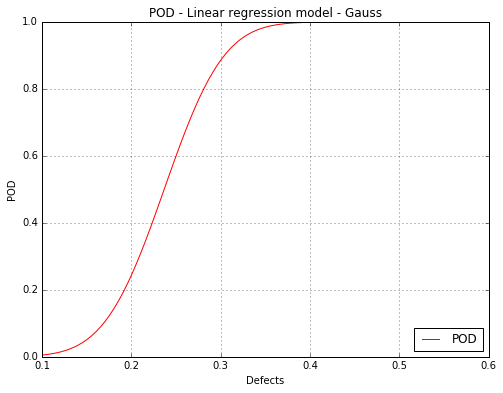

In [9]:
fig, ax = PODGauss.drawPOD()
fig.show()

### Mean POD with the detection size for a given probability level

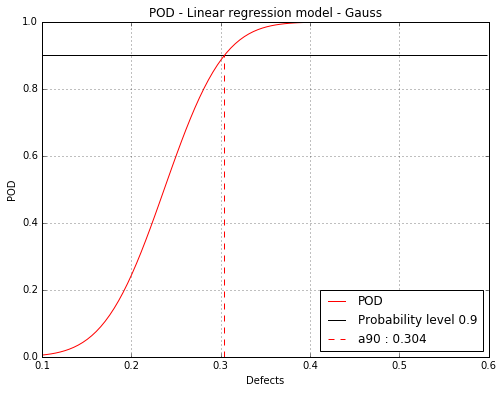

In [10]:
fig, ax = PODGauss.drawPOD(probabilityLevel=0.9)
fig.show()

### Mean POD with POD at confidence level

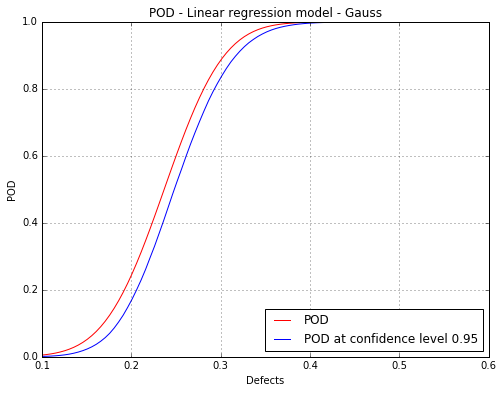

In [11]:
fig, ax = PODGauss.drawPOD(confidenceLevel=0.95)
fig.show()

### Mean POD and POD at confidence level with the detection size for a given probability level

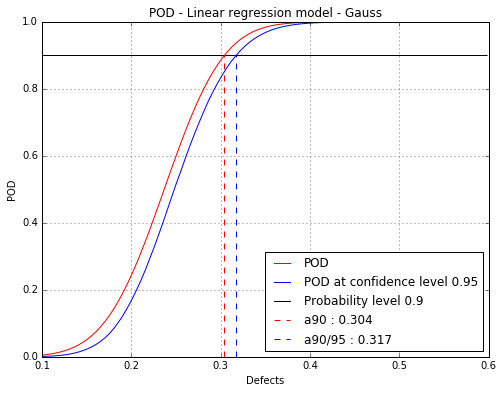

In [12]:
fig, ax = PODGauss.drawPOD(probabilityLevel=0.9, confidenceLevel=0.95,
                      name='figure/PODGauss.png')
# The figure is saved in PODGauss.png
fig.show()

## Build POD with no hypothesis on the residuals
This corresponds with the Berens Binomial method.

In [13]:
PODBinomial = otpod.UnivariateLinearModelPOD(defects, signals, detection, boxCox=True)
PODBinomial.run()

In [14]:
# Detection size at probability level 0.9
# and confidence level 0.95
print(PODBinomial.computeDetectionSize(0.9, 0.95))

[a90 : 0.298739, a90/95 : 0.329606]


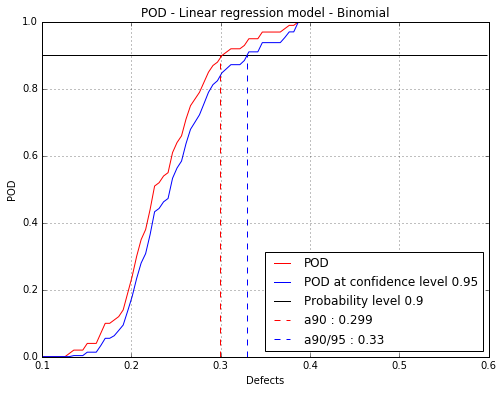

In [15]:
fig, ax = PODBinomial.drawPOD(0.9, 0.95)
fig.show()

## Build POD with kernel smoothing on the residuals
The POD at the given confidence level is built using bootstrap. It may take few seconds. A progress bar if displayed is in this case. It can be remove using setVerbose(False)

In [16]:
PODks = otpod.UnivariateLinearModelPOD(defects, signals, detection,
                                             resDistFact=ot.KernelSmoothing(),
                                             boxCox=True)
PODks.run()

Computing POD (bootstrap): [==================================================] 100.00% Done


In [17]:
# Detection size at probability level 0.9
# and confidence level 0.95
print(PODks.computeDetectionSize(0.9, 0.95))

[a90 : 0.308381, a90/95 : 0.331118]


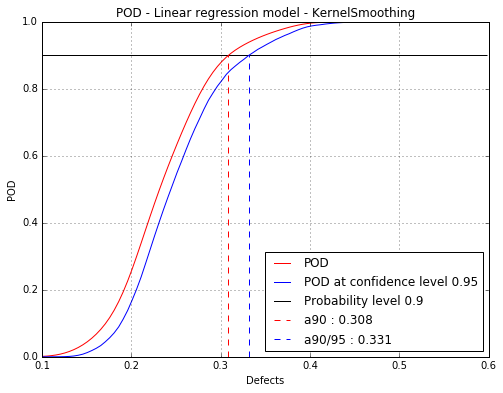

In [18]:
fig, ax = PODks.drawPOD(0.9, 0.95)
fig.show()